# PCA

this notebook and codes are from <a href="https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21">here medium</a>

방대한 양의 데이터는 때때로 문제를 일으킨다. 

In [112]:
import numpy 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.


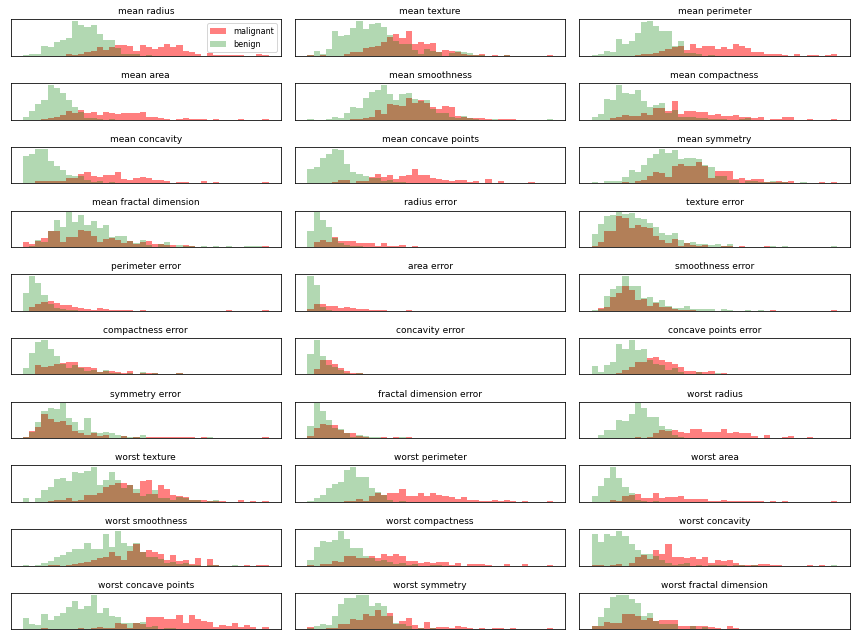

In [113]:
fig,axes =plt.subplots(10,3, figsize=(12, 9)) 
malignant=cancer.data[cancer.target==0] 
benign=cancer.data[cancer.target==1] 
ax=axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=40)
    ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)
    ax[i].set_title(cancer.feature_names[i],fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_yticks(())
    
    
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.


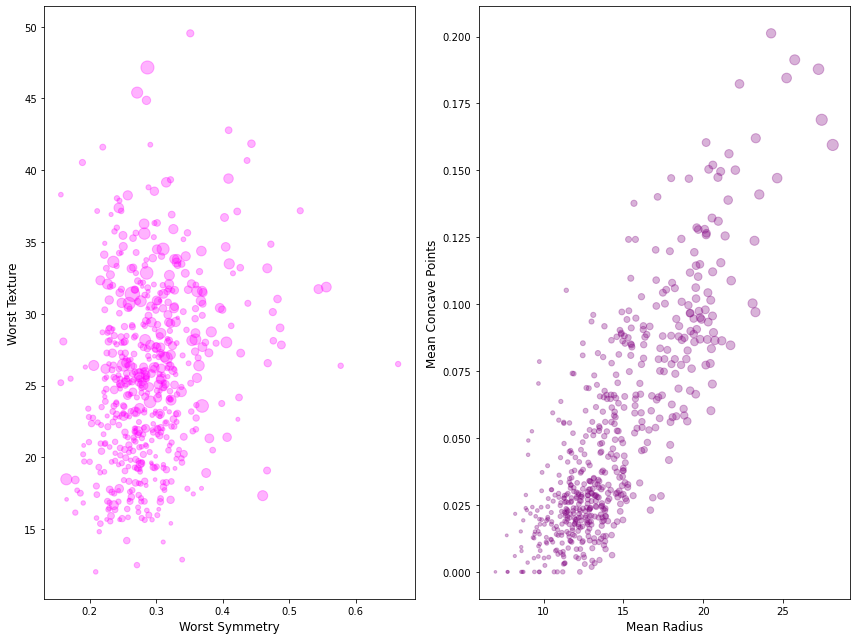

In [114]:
import pandas as pd

cancer_frame = pd.DataFrame(cancer.data,columns=cancer.feature_names)

plt.figure(figsize=(12,9))
plt.subplot(1, 2, 1)
plt.scatter(cancer_frame['worst symmetry'], cancer_frame['worst texture'],
            s= cancer_frame['worst area']*0.05,
            color='magenta', label='check', alpha=0.3)

plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(cancer_frame['mean radius'], cancer_frame['mean concave points'], s=cancer_frame['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

In [115]:
cancer_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(cancer.data)

In [117]:
X_scaled.min()

0.0

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X_scaled)

In [119]:
pca_frame = pd.DataFrame(X_pca,columns=['component_1', 'component_2', 'component_3'])

In [120]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio )

[0.68517019 0.22302537 0.09180444]


In [121]:
ex_variance/sum(np.var(pca_frame))

array([0.68517019, 0.22302537, 0.09180444])

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


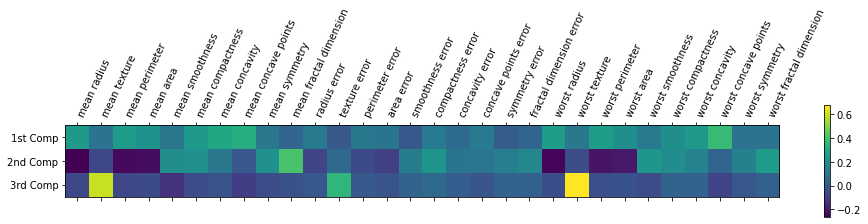

In [122]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()

findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.


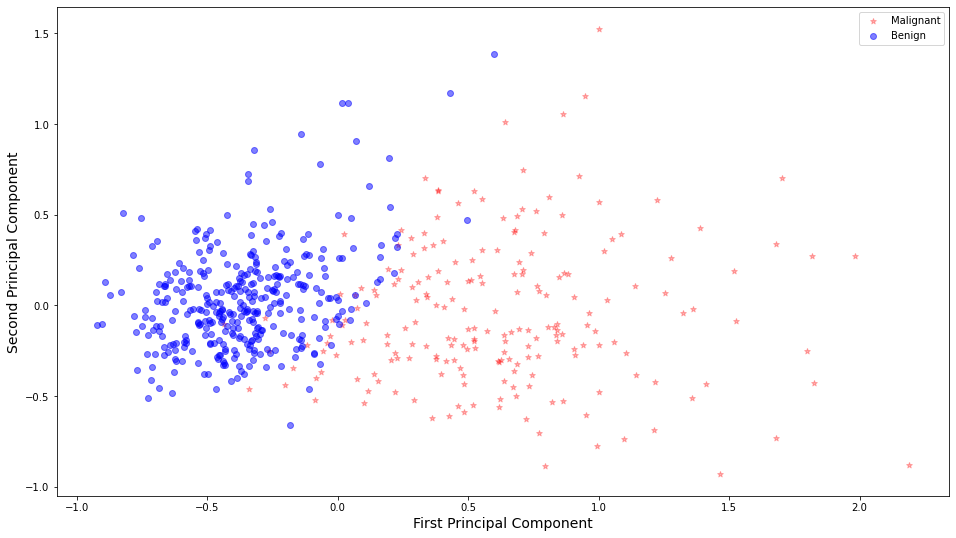

In [123]:
comp_1 = X_pca[:,0]
comp_2 = X_pca[:,1]
comp_3 = X_pca[:,2]

labels = cancer.target

color_dict = {0: 'red', 1: 'blue'}
alpha = {0: 0.3, 1: 0.5}
label = {0: 'Malignant', 1: 'Benign'}
marker = {0: '*', 1: 'o'}

fig,ax=plt.subplots(figsize=(16,9))
fig.patch.set_facecolor('white')

for l in np.unique(labels):
    ix = np.where(labels == l)
    ax.scatter(comp_1[ix], comp_2[ix], label = label[l], alpha = alpha[l], marker= marker[l], c= color_dict[l])
    
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [124]:
from tensorflow.keras.datasets import mnist

(X_train, _), (_, _) = mnist.load_data()

In [125]:
#28 * 28이미지를 784차원의 6000개 데이터로 치환
flattened_mnist = X_train.reshape(60000, 28*28)


#n_component를 50, 100, 150, 200, 250으로 늘여가며 얼만큼 데이터를 설명할 수 있는지 확인

#데이터를 0-1까지로 치환

flattened_mnist = flattened_mnist/255.

In [126]:
mnist_pca_50 = PCA(n_components=50)
mnist_pca_100 = PCA(n_components=100)
mnist_pca_150 = PCA(n_components=150)
mnist_pca_200 = PCA(n_components=200)
mnist_pca_250 = PCA(n_components=250)

X_pca_50 = mnist_pca_50.fit_transform(flattened_mnist)
X_pca_100 = mnist_pca_100.fit_transform(flattened_mnist)
X_pca_150 = mnist_pca_150.fit_transform(flattened_mnist)
X_pca_200 = mnist_pca_200.fit_transform(flattened_mnist)
X_pca_250 = mnist_pca_250.fit_transform(flattened_mnist)

In [127]:
sum(mnist_pca_50.explained_variance_ratio_)

0.8245954557222659

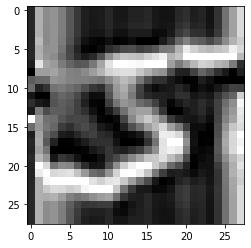

In [130]:
inverse_50 = mnist_pca_50.inverse_transform(X_pca_50)
sample = inverse_50[0]
scale_50 = MinMaxScaler()
inverse_sample = scale_50.fit_transform(sample.reshape((28, 28)))
plt.imshow(inverse_sample,cmap= 'gray')



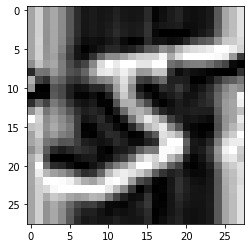

In [133]:
inverse_100 = mnist_pca_100.inverse_transform(X_pca_100)
sample = inverse_100[0]
scale_100 = MinMaxScaler()
inverse_sample = scale_100.fit_transform(sample.reshape((28, 28)))
plt.imshow(inverse_sample,cmap= 'gray')

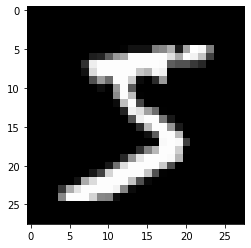

In [134]:
plt.imshow(flattened_mnist[0].reshape((28, 28)), cmap= 'gray')

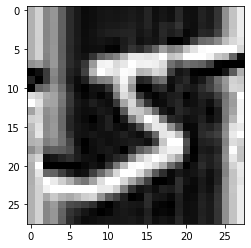

In [136]:
inverse_150 = mnist_pca_150.inverse_transform(X_pca_150)
sample = inverse_150[0]
scale_150 = MinMaxScaler()
inverse_sample = scale_150.fit_transform(sample.reshape((28, 28)))
plt.imshow(inverse_sample,cmap= 'gray')

In [137]:
sum(mnist_pca_150.explained_variance_ratio_)

0.947954893622623

In [138]:
x = np.linspace(-6*np.pi, 6* np.pi, 100)
y = np.linspace(-6*np.pi, 6* np.pi, 100)

xx, yy = np.meshgrid(x,y)

In [139]:
r = np.sqrt(xx**2 + yy ** 2)
z = np.sin(r)

In [169]:
from skimage.data import coffee

coffee = (coffee()/255.).reshape((400*600, 3))
coffee_df = pd.DataFrame(coffee)


In [170]:
coffee_df

,0,1,2
0,0.082353,0.050980,0.031373
1,0.082353,0.050980,0.035294
2,0.078431,0.043137,0.031373
3,0.082353,0.050980,0.043137
4,0.082353,0.054902,0.031373
...,...,...,...
239995,0.654902,0.317647,0.149020
239996,0.592157,0.262745,0.098039
239997,0.619608,0.286275,0.149020
239998,0.564706,0.250980,0.117647


In [189]:
coffee_pca = PCA(n_components=1)

In [190]:
pca_coffee = coffee_pca.fit_transform(coffee_df)

In [191]:
pcaed = coffee_pca.inverse_transform(pca_coffee)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


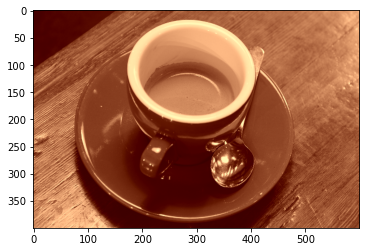

In [192]:
plt.imshow(pcaed.reshape((400, 600, 3)))

In [193]:
coffee_pca.explained_variance_ratio_

array([0.88800357])

In [235]:
theta = np.linspace(0, 2 * np.pi, 100)

x = np.cos(theta)
y = np.sin(theta)

transform = np.array(((0.25, 0.75),(1, 0.5)))

x_list = []
y_list = []
for i in range(len(x)):
    lin_transformed = np.dot(transform, (x[i], y[i]))
    x_list.append(lin_transformed[0])
    y_list.append(lin_transformed[1])
    

In [234]:
np.dot(transform , (1,0))[0]

0.25

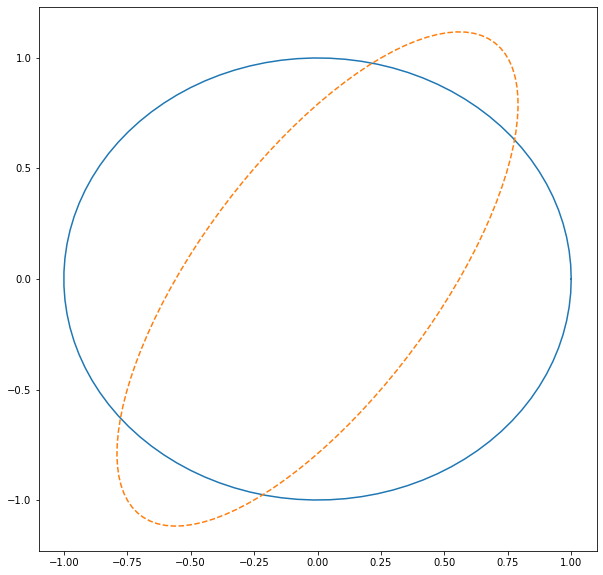

In [240]:

plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.plot(x_list, y_list, '--')

In [247]:
import plotly.graph_objects as go

trans_dict= {"x":x_list, "y": y_list}

In [253]:
go.scatter.Line(trans_dict)

ValueError: Invalid properties specified for object of type plotly.graph_objs.scatter.Line: ('x', 'y')

    Valid properties:
        color
            Sets the line color.
        dash
            Sets the dash style of lines. Set to a dash type string
            ("solid", "dot", "dash", "longdash", "dashdot", or
            "longdashdot") or a dash length list in px (eg
            "5px,10px,2px,2px").
        shape
            Determines the line shape. With "spline" the lines are
            drawn using spline interpolation. The other available
            values correspond to step-wise line shapes.
        simplify
            Simplifies lines by removing nearly-collinear points.
            When transitioning lines, it may be desirable to
            disable this so that the number of points along the
            resulting SVG path is unaffected.
        smoothing
            Has an effect only if `shape` is set to "spline" Sets
            the amount of smoothing. 0 corresponds to no smoothing
            (equivalent to a "linear" shape).
        width
            Sets the line width (in px).
        

In [ ]:
{}